In [5]:
import pandas as pd
import numpy as np
import warnings
import os

from geopy.geocoders import Nominatim


In [6]:
warnings.filterwarnings('ignore')

In [7]:
# 1. **Magnitude**: Likely to be a strong predictor for the occurrence of a tsunami.
# 2. **Depth**: The depth of the earthquake can also be crucial; shallower earthquakes are more likely to trigger tsunamis.
# 3. **Latitude and Longitude**: These can be important if there are certain geographic regions that are more prone to tsunamis.
# 4. **Dmin**: Minimum distance to the station; could indicate how localized or widespread the seismic activity is.
# 5. **Gap**: Could help in indicating the reliability of the seismic reading.
# 6. **Sig**: An overall 'significance' score that takes into account various factors could be a good predictor.
# 7. **NST**: Number of stations that reported could be indicative of the event's magnitude.

# You might not want to include:

# 1. **CDI and MMI**: These are measures of the impact of the earthquake, which could be seen as outcomes rather than predictors.
# 2. **Year and Month**: Unless you have a reason to suspect seasonal or annual trends, these may not be helpful.

In [8]:
df = pd.read_csv('earthquake_1995-2023_fixed.csv')
# Filter the dataset to only include rows where 'country' is 'Japan' (for example)
df = df.loc[df['country'] == 'Indonesia']



In [9]:
# from opencage.geocoder import OpenCageGeocode
# df = pd.read_csv('earthquake_1995-2023.csv')
# ## Initialize the geocoder
# key = '69dd9def50244697950b7aed4b0ddfc0'  # Your API key
# geocoder = OpenCageGeocode(key)

# def get_location_by_coordinates_opencage(lat, lon):
#     """Get location details from latitude and longitude."""
#     results = geocoder.reverse_geocode(lat, lon)

#     print("API Results:", results)

#     country = ''
#     continent = ''
#     body_of_water = ''

#     if len(results) > 0:
#         components = results[0]['components']
#         country = components.get('country', '')
#         continent = components.get('continent', '')
#         body_of_water = components.get('body_of_water', '')

#         print(f'lat: {lat}, lon: {lon}')
#         print(f'country: {country}')
#         print(f'continent: {continent}')
#         print(f'body_of_water: {body_of_water}')
#         print("\n")

#     return country, continent if continent else body_of_water

# # Update the missing values
# print ('reached here')
# for i, row in df.iterrows():
#     if pd.isna(row['country']) or pd.isna(row['continent']):
#         print(f"Row {i} - Update Needed: Country: {row['country']}, Continent: {row['continent']}")
#         lat, lon = row['latitude'], row['longitude']
#         country, geographic_info = get_location_by_coordinates_opencage(lat, lon)
#         df.at[i, 'country'] = country
#         df.at[i, 'continent'] = geographic_info  # Changed to 'continent' to make it consistent

#         #print updated row
#         print(f"Updated Row {i}:")
#         print(df.loc[i])
#         print("="*40)
# # Save the updated DataFrame
# df.to_csv('earthquake_1995-2023_fixed.csv', index=False)

In [10]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
13,"M 7.1 - 170 km SSE of Teluk Dalam, Indonesia",7.1,24-04-2023 20:00,9,7,green,0,838,us,70,2.282,58.0,mww,15.462,-0.7810,98.5339,"Teluk Dalam, Indonesia",Asia,Indonesia
16,"M 7.0 - 96 km N of Tuban, Indonesia",7.0,14-04-2023 09:55,5,3,green,0,818,us,131,1.881,31.0,mww,594.028,-6.0255,112.0330,"Tuban, Indonesia",Asia,Indonesia
31,"M 7.0 - 153 km NW of Tobelo, Indonesia",7.0,18-01-2023 06:06,3,5,green,1,756,us,130,1.974,17.0,mwc,28.566,2.7401,127.0510,"Tobelo, Indonesia",Asia,Indonesia
32,"M 7.6 - Pulau Pulau Tanimbar, Indonesia",7.6,09-01-2023 17:47,5,7,green,0,957,us,114,1.575,21.0,mww,105.249,-7.0852,130.0390,"Pulau Pulau Tanimbar, Indonesia",Asia,Indonesia
61,"M 6.7 - 166 km W of Pariaman, Indonesia",6.7,13-03-2022 21:09,9,6,green,0,708,us,0,2.188,43.0,mww,28.000,-0.6831,98.6034,"Pariaman, Indonesia",Asia,Indonesia


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 13 to 997
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      140 non-null    object 
 1   magnitude  140 non-null    float64
 2   date_time  140 non-null    object 
 3   cdi        140 non-null    int64  
 4   mmi        140 non-null    int64  
 5   alert      42 non-null     object 
 6   tsunami    140 non-null    int64  
 7   sig        140 non-null    int64  
 8   net        140 non-null    object 
 9   nst        140 non-null    int64  
 10  dmin       140 non-null    float64
 11  gap        140 non-null    float64
 12  magType    140 non-null    object 
 13  depth      140 non-null    float64
 14  latitude   140 non-null    float64
 15  longitude  140 non-null    float64
 16  location   140 non-null    object 
 17  continent  140 non-null    object 
 18  country    140 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [12]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,6.950714,3.150000,6.078571,0.100000,794.135714,219.550000,0.631721,17.080000,72.165750,-2.586550,117.736515
std,0.458885,3.048587,1.150964,0.301077,196.397124,214.633444,1.119675,12.615351,131.036246,3.717350,13.839516
min,6.500000,0.000000,2.000000,0.000000,650.000000,0.000000,0.000000,0.000000,9.000000,-9.362000,95.592000
25%,6.600000,0.000000,5.000000,0.000000,689.250000,0.000000,0.000000,0.000000,20.000000,-5.900625,101.418750
50%,6.800000,3.000000,6.000000,0.000000,736.500000,238.500000,0.000000,18.000000,30.550000,-2.443500,122.558000
75%,7.100000,5.000000,7.000000,0.000000,842.000000,398.750000,1.370750,26.050000,43.657500,0.283400,128.080750
max,9.100000,9.000000,8.000000,1.000000,2026.000000,695.000000,6.278000,58.000000,624.000000,5.410000,140.233000


In [13]:
df.isnull().sum()/df.shape[0]*100

title         0.0
magnitude     0.0
date_time     0.0
cdi           0.0
mmi           0.0
alert        70.0
tsunami       0.0
sig           0.0
net           0.0
nst           0.0
dmin          0.0
gap           0.0
magType       0.0
depth         0.0
latitude      0.0
longitude     0.0
location      0.0
continent     0.0
country       0.0
dtype: float64

# Dropping Unnecessary Data

In [14]:
## Drop unecessary columns and convert time into year and month.
df.drop(['alert','title','location'],axis=1,inplace=True)
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [15]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
13,7.1,9,7,0,838,us,70,2.282,58.0,mww,15.462,-0.7810,98.5339,Asia,Indonesia,2023,4
16,7.0,5,3,0,818,us,131,1.881,31.0,mww,594.028,-6.0255,112.0330,Asia,Indonesia,2023,4
31,7.0,3,5,1,756,us,130,1.974,17.0,mwc,28.566,2.7401,127.0510,Asia,Indonesia,2023,1
32,7.6,5,7,0,957,us,114,1.575,21.0,mww,105.249,-7.0852,130.0390,Asia,Indonesia,2023,9
61,6.7,9,6,0,708,us,0,2.188,43.0,mww,28.000,-0.6831,98.6034,Asia,Indonesia,2022,3


In [16]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
continent    0
country      0
Year         0
Month        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 13 to 997
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  140 non-null    float64
 1   cdi        140 non-null    int64  
 2   mmi        140 non-null    int64  
 3   tsunami    140 non-null    int64  
 4   sig        140 non-null    int64  
 5   net        140 non-null    object 
 6   nst        140 non-null    int64  
 7   dmin       140 non-null    float64
 8   gap        140 non-null    float64
 9   magType    140 non-null    object 
 10  depth      140 non-null    float64
 11  latitude   140 non-null    float64
 12  longitude  140 non-null    float64
 13  continent  140 non-null    object 
 14  country    140 non-null    object 
 15  Year       140 non-null    int64  
 16  Month      140 non-null    int64  
dtypes: float64(6), int64(7), object(4)
memory usage: 19.7+ KB


# EDA (need further analysis to new dataset, will be compelete by zihan on saturady

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

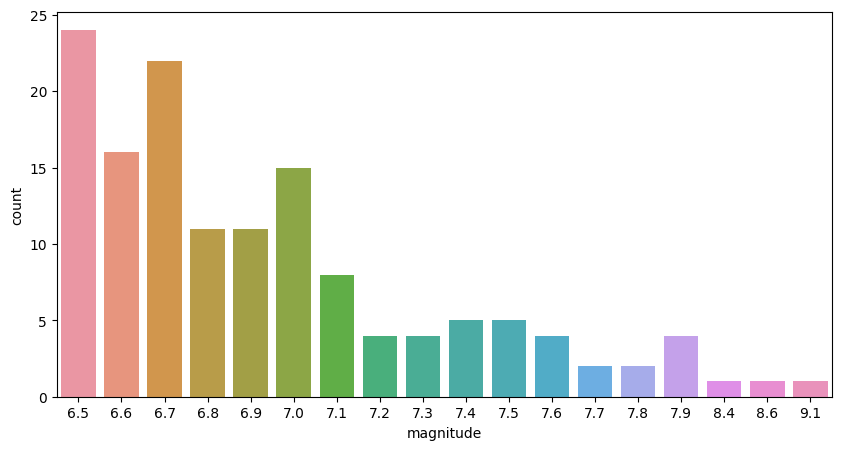

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale resulted from kaggle.

Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

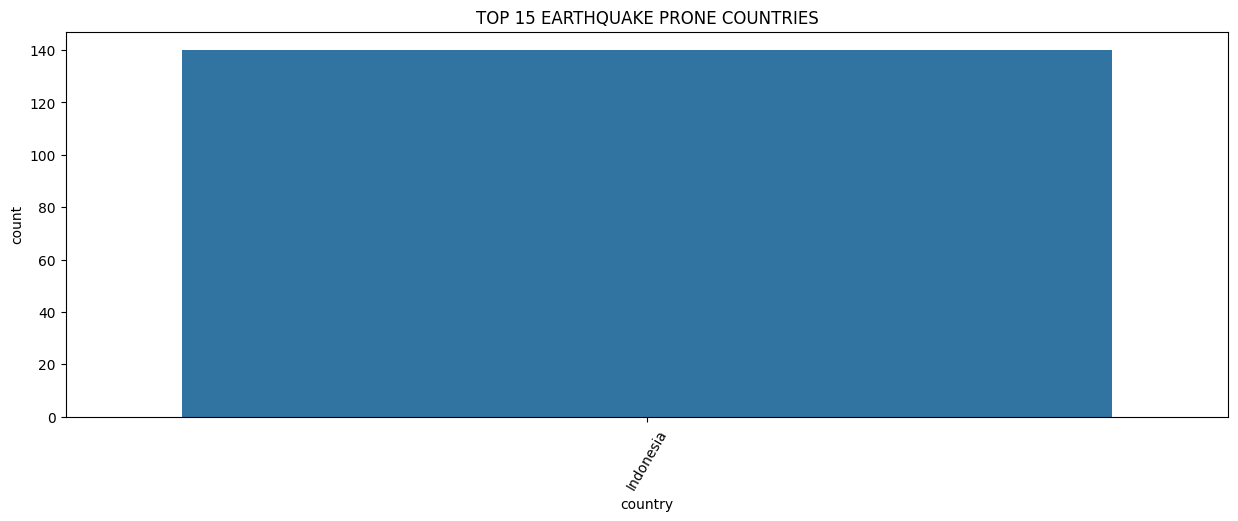

In [20]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

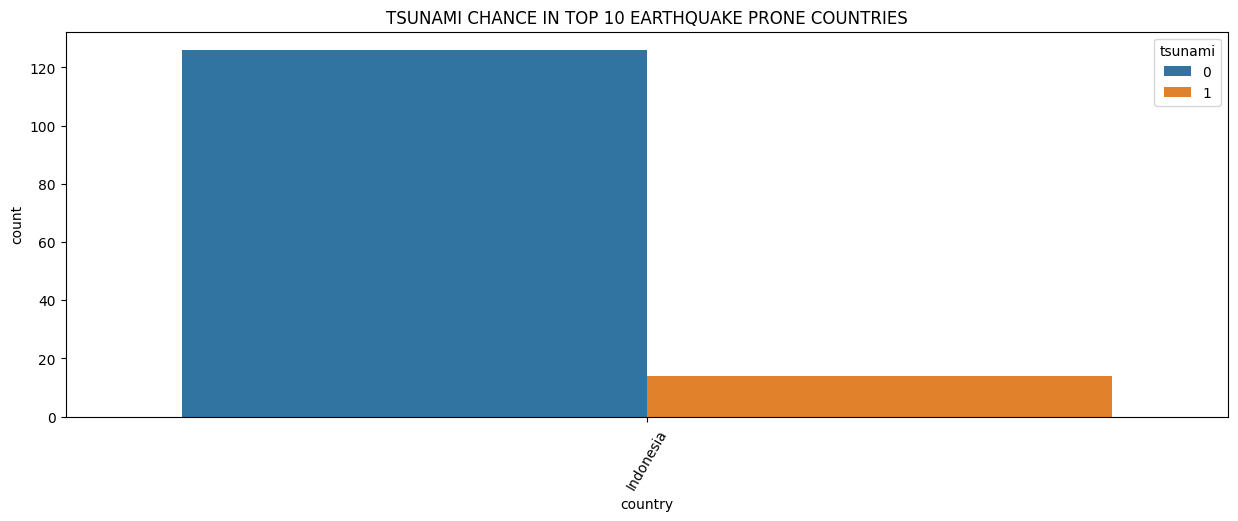

In [21]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

<Axes: xlabel='sig', ylabel='magnitude'>

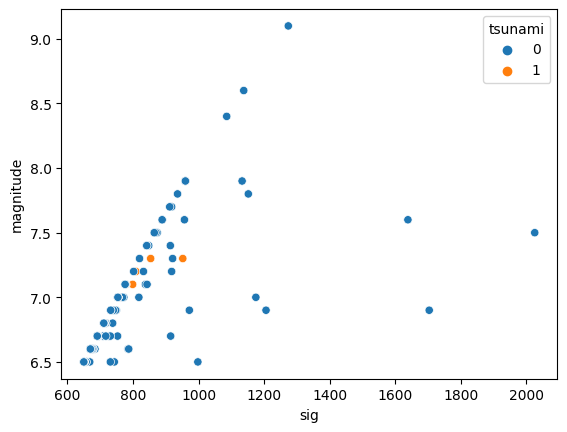

In [22]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

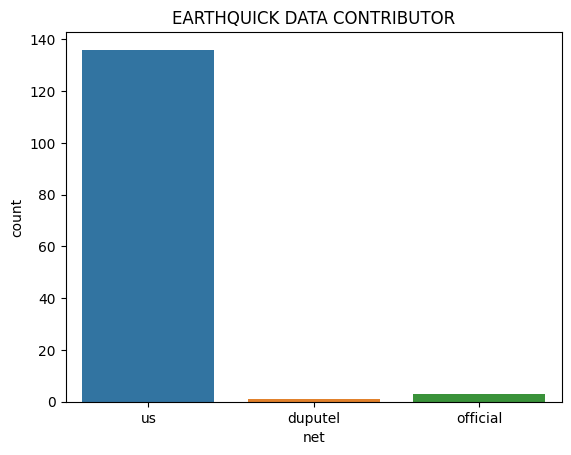

In [23]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'Tsunami Distribution')

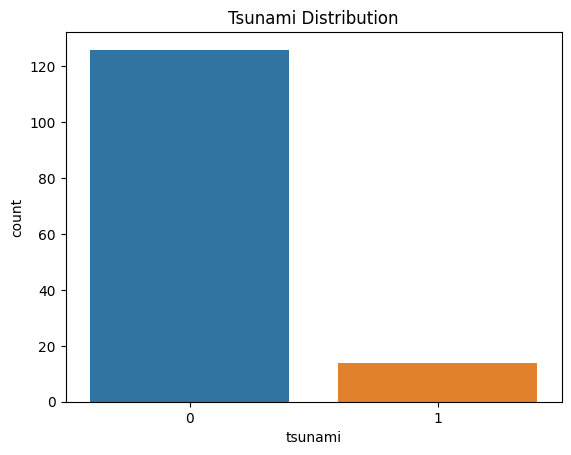

In [24]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

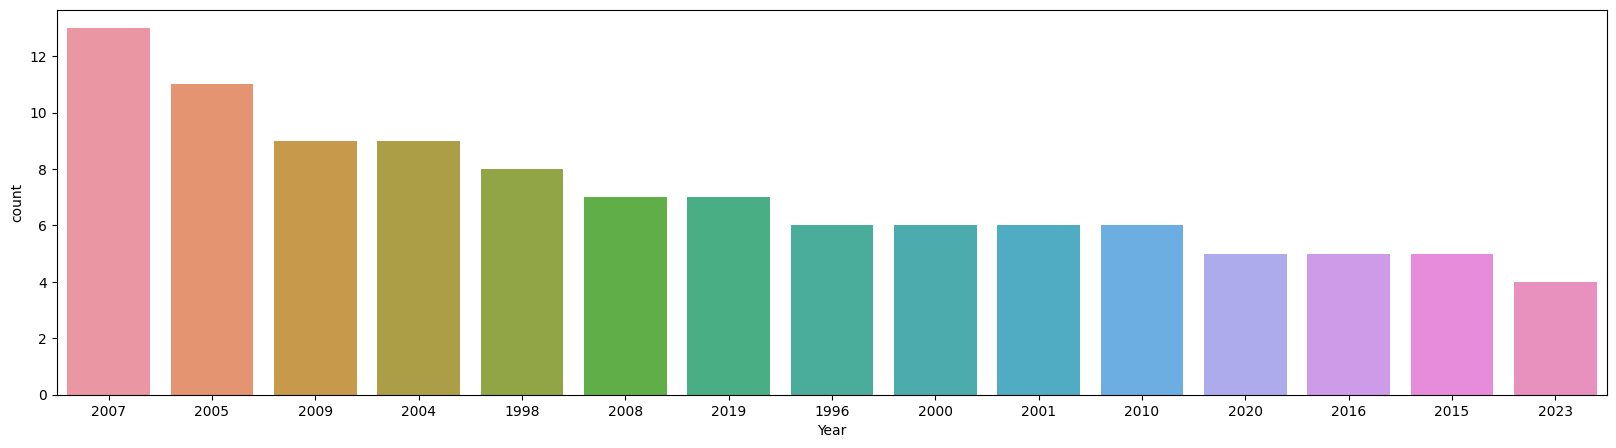

In [25]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN Indonesia PER YEAR')

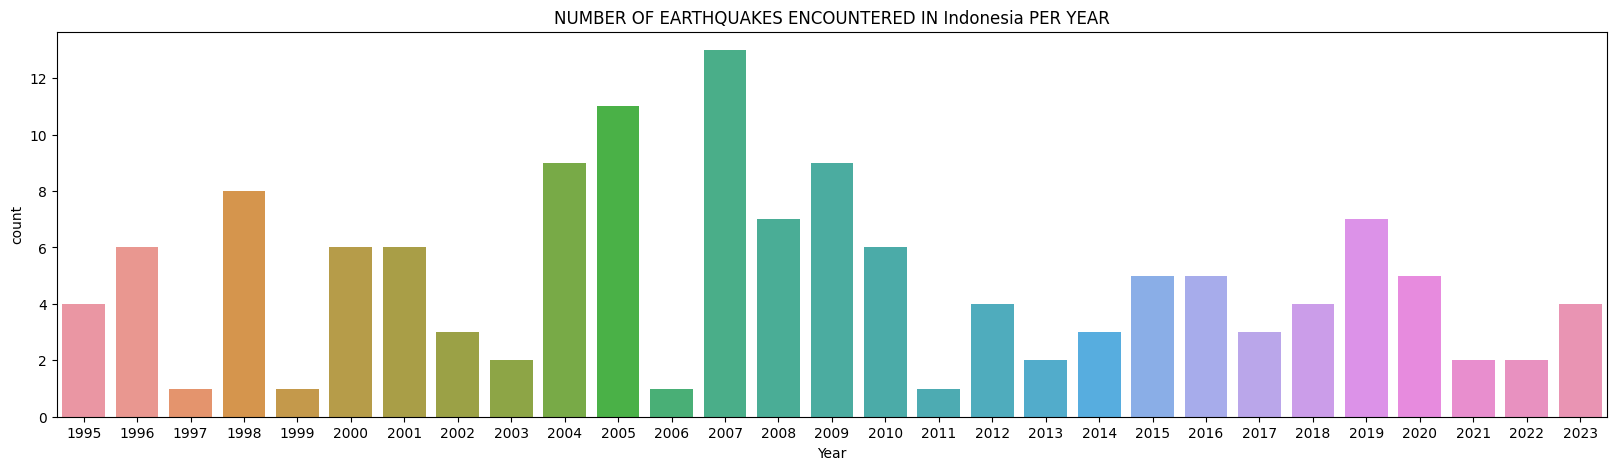

In [26]:
# Do this with japan as well
Japan=df[df['country']=='Indonesia']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Japan)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN Indonesia PER YEAR')
#Papua New Guinea experiences at least one earthquake per year

# Feature Engineering Continue

In [27]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
13,7.1,9,7,0,838,us,70,2.282,58.0,mww,15.462,-0.7810,98.5339,Asia,Indonesia,2023,4
16,7.0,5,3,0,818,us,131,1.881,31.0,mww,594.028,-6.0255,112.0330,Asia,Indonesia,2023,4
31,7.0,3,5,1,756,us,130,1.974,17.0,mwc,28.566,2.7401,127.0510,Asia,Indonesia,2023,1
32,7.6,5,7,0,957,us,114,1.575,21.0,mww,105.249,-7.0852,130.0390,Asia,Indonesia,2023,9
61,6.7,9,6,0,708,us,0,2.188,43.0,mww,28.000,-0.6831,98.6034,Asia,Indonesia,2022,3


In [28]:
## we will drop the year and month, since the tsunami is not a seasonale staff. It can occurs anytime.
df.drop(['Year', 'Month'], axis=1,inplace=True)#we have latitude and longitude

In [29]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType,continent,country
13,us,mww,Asia,Indonesia
16,us,mww,Asia,Indonesia
31,us,mwc,Asia,Indonesia
32,us,mww,Asia,Indonesia
61,us,mww,Asia,Indonesia
...,...,...,...,...
970,us,mw,Asia,Indonesia
971,us,mw,Asia,Indonesia
972,us,mwb,Asia,Indonesia
980,us,mw,Asia,Indonesia


In [30]:
obj.nunique()

net          3
magType      6
continent    1
country      1
dtype: int64

In [31]:
## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj.drop('net',axis=1,inplace=True)
df.drop(['net','country', 'continent','magType'],axis=1,inplace=True)

In [32]:
## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
13,7.1,9,7,0,838,70,2.282,58.0,15.462,-0.7810,98.5339,5,0,0
16,7.0,5,3,0,818,131,1.881,31.0,594.028,-6.0255,112.0330,5,0,0
31,7.0,3,5,1,756,130,1.974,17.0,28.566,2.7401,127.0510,4,0,0
32,7.6,5,7,0,957,114,1.575,21.0,105.249,-7.0852,130.0390,5,0,0
61,6.7,9,6,0,708,0,2.188,43.0,28.000,-0.6831,98.6034,5,0,0


           magnitude       cdi       mmi   tsunami       sig       nst  \
magnitude   1.000000       NaN  0.339746       NaN  0.621883       NaN   
cdi              NaN  1.000000       NaN       NaN       NaN       NaN   
mmi         0.339746       NaN  1.000000       NaN  0.400043       NaN   
tsunami          NaN       NaN       NaN  1.000000       NaN       NaN   
sig         0.621883       NaN  0.400043       NaN  1.000000       NaN   
nst              NaN       NaN       NaN       NaN       NaN  1.000000   
dmin             NaN  0.531481       NaN  0.419221       NaN -0.556061   
gap              NaN  0.396988       NaN       NaN       NaN       NaN   
depth            NaN       NaN -0.610546       NaN       NaN       NaN   
latitude         NaN       NaN       NaN       NaN       NaN       NaN   
longitude        NaN       NaN       NaN       NaN       NaN       NaN   
magType          NaN  0.564232       NaN  0.304772       NaN       NaN   
continent        NaN       NaN       N

<Axes: >

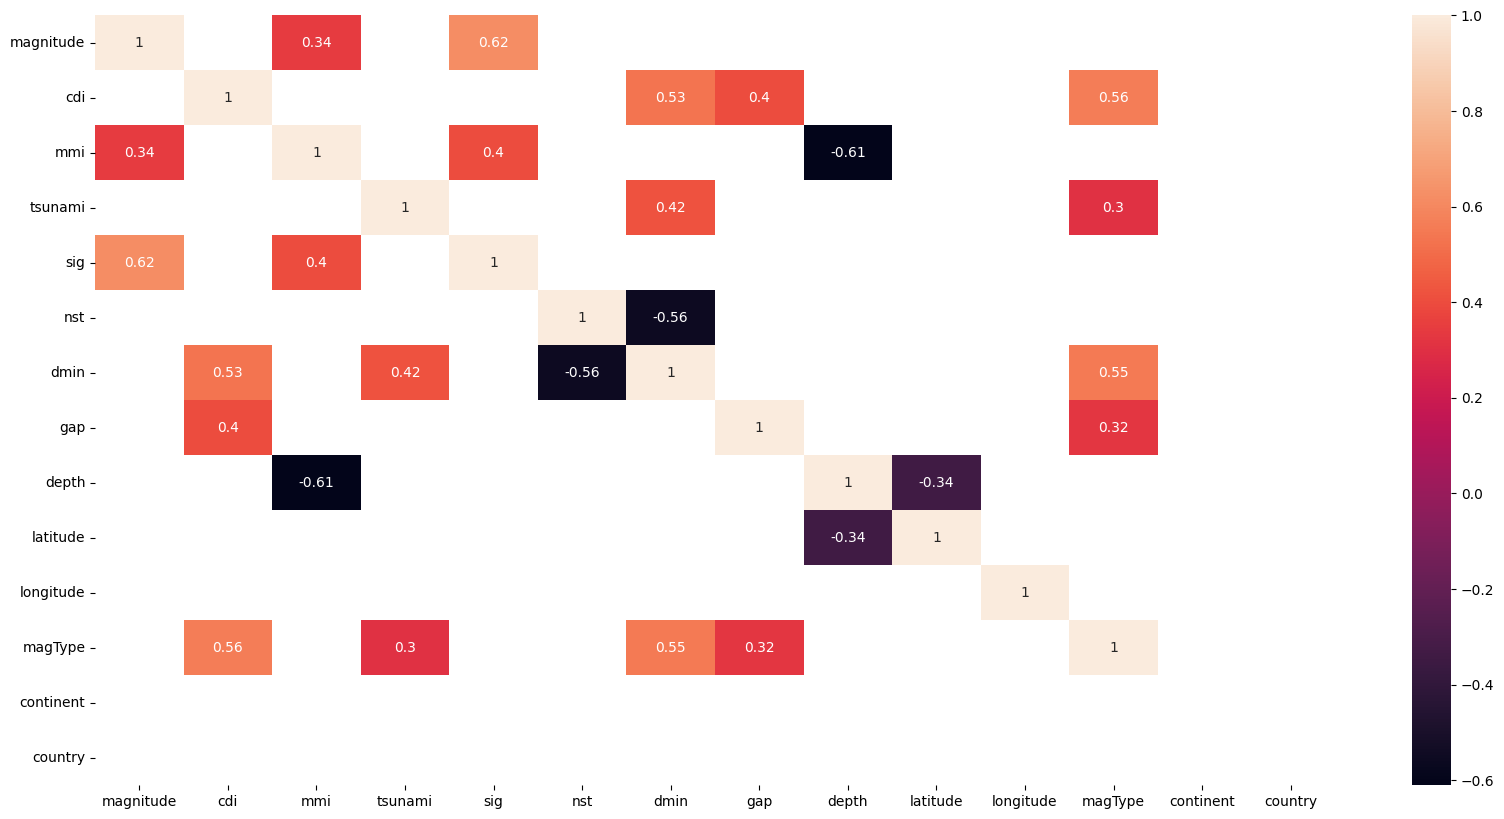

In [33]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
print(d)
sns.heatmap(d,annot=True)

# Scaling and model building

In [52]:
# Same model setting from the baseline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [35]:
# Prepocess dataset obtain tree and test dataset.
sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

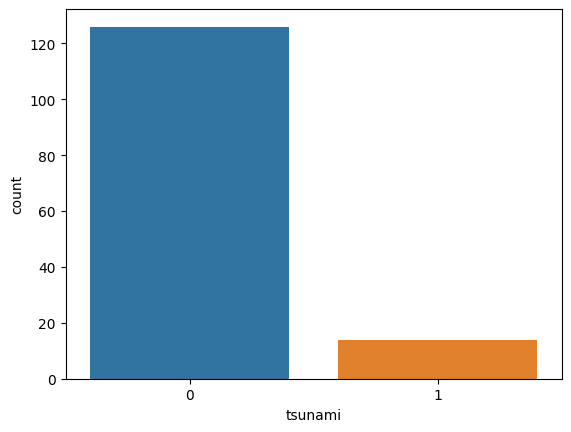

In [36]:
sns.countplot(x=y,data=df)

# Handling data imbalance

In [37]:
sm=SMOTE()
#x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
x_train_res = x_train
y_train_res = y_train

In [38]:
x_train_res.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
57,0.107789,1.267415,0.803446,1.946219,0.432281,-0.566227,-0.062051,-0.200400,-1.402640,-0.757035,-0.092981,0.0,0.0
8,-0.110913,0.279819,-2.684381,-0.230644,-1.026580,1.465738,0.232295,4.226431,-1.102536,0.417439,0.991801,0.0,0.0
69,-0.985722,0.609017,0.803446,-0.721204,0.245248,-0.566227,0.836899,-0.414849,-1.521969,0.052972,-0.092981,0.0,0.0
4,-0.548318,1.925812,-0.068511,-0.440154,-1.026580,1.394929,2.062017,-0.338260,0.513883,-1.387463,0.991801,0.0,0.0
121,1.638704,-1.036976,0.803446,0.602287,-1.026580,-0.566227,-1.358767,-0.299966,0.139185,0.518817,-0.092981,0.0,0.0


In [39]:
y_train_res.head()

571    0
124    0
614    0
61     0
886    0
Name: tsunami, dtype: int64

In [40]:
# Tree Models
models = {
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [41]:
for name,model in models.items():
    model.fit(x_train_res,y_train_res)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28

.........................................................|
Model:  xg
------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00    

# Grid Search: Hyperparameter

In [42]:
#XG

In [43]:
# Model: XG boosted tree
model_xg=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid_xg= GridSearchCV(model_xg, params, cv=5)
grid_xg.fit(x_train_res,y_train_res)
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.9375494071146244


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28

Axes(0.125,0.11;0.62x0.77)


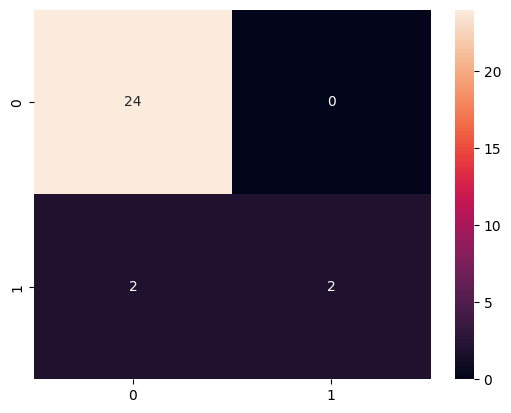

In [44]:
# Result of XG
p_xg = grid_xg.predict(x_test)
print(classification_report(y_test,p_xg))
print(sns.heatmap(confusion_matrix(y_test,p_xg),annot=True))

In [45]:
# Random forest

In [46]:
# Model Random forest
model_rf=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf= GridSearchCV(model_rf, params, cv=5)
grid_rf.fit(x_train_res,y_train_res)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9197628458498024


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28

Axes(0.125,0.11;0.62x0.77)


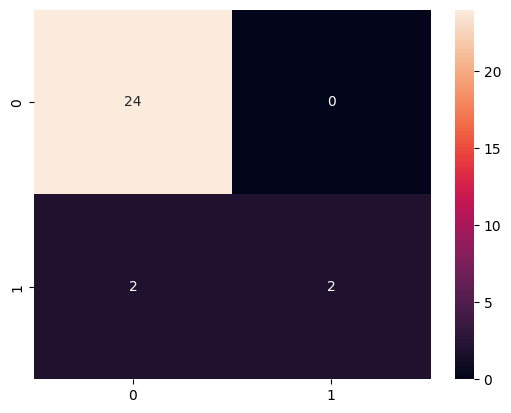

In [47]:
# Results of Random forest
p_rf = grid_rf.predict(x_test)
print(classification_report(y_test,p_rf))
print(sns.heatmap(confusion_matrix(y_test,p_rf),annot=True))

In [48]:
print(x_train_res)

     magnitude       cdi       mmi       sig       nst      dmin       gap  \
57    0.107789  1.267415  0.803446  1.946219  0.432281 -0.566227 -0.062051   
8    -0.110913  0.279819 -2.684381 -0.230644 -1.026580  1.465738  0.232295   
69   -0.985722  0.609017  0.803446 -0.721204  0.245248 -0.566227  0.836899   
4    -0.548318  1.925812 -0.068511 -0.440154 -1.026580  1.394929  2.062017   
121   1.638704 -1.036976  0.803446  0.602287 -1.026580 -0.566227 -1.358767   
..         ...       ...       ...       ...       ...       ...       ...   
111   0.326491 -1.036976  0.803446 -0.092674  0.965326 -0.566227 -1.358767   
58   -0.548318  0.609017 -0.068511 -0.210204  0.698804 -0.566227 -0.173426   
97   -0.985722 -1.036976  0.803446 -0.736535  0.399550 -0.566227  1.743805   
25   -0.548318 -0.049380 -2.684381 -0.511694 -1.026580  0.898366 -0.085917   
89    3.607024 -1.036976  1.675403  1.757149  1.358096 -0.566227  0.399357   

        depth  latitude  longitude   magType  continent  countr

In [49]:
print(x_test)

     magnitude       cdi       mmi       sig       nst      dmin       gap  \
12   -0.329615  0.279819 -0.068511 -0.286854 -1.026580  1.155611 -0.085917   
116  -0.548318 -1.036976 -0.940468 -0.527024  0.619314 -0.566227 -1.358767   
23   -0.110913  1.925812  1.675403  4.649413 -1.026580  1.469324 -0.165471   
9    -0.110913  0.279819 -1.812425 -0.302184 -1.026580  0.971864  0.630061   
106  -0.548318 -1.036976  0.803446 -0.527024  0.142379 -0.566227 -1.358767   
137  -0.985722 -1.036976 -0.068511 -0.736535 -1.026580 -0.566227 -1.358767   
22   -0.985722  0.609017 -2.684381 -0.261304 -1.026580  1.870877  0.470955   
87   -0.985722 -0.049380 -0.068511 -0.700764  1.208470 -0.566227  0.327759   
44   -0.767020  0.279819 -0.940468 -0.593454  1.297311 -0.566227 -0.197292   
110  -0.985722 -1.036976 -0.068511 -0.736535 -0.063358 -0.566227 -1.358767   
128   0.107789 -1.036976 -0.068511 -0.205094 -1.026580 -0.566227 -1.358767   
127  -0.548318 -1.036976 -0.068511 -0.527024 -1.026580 -0.566227

In [50]:
print(x_train)

     magnitude       cdi       mmi       sig       nst      dmin       gap  \
57    0.107789  1.267415  0.803446  1.946219  0.432281 -0.566227 -0.062051   
8    -0.110913  0.279819 -2.684381 -0.230644 -1.026580  1.465738  0.232295   
69   -0.985722  0.609017  0.803446 -0.721204  0.245248 -0.566227  0.836899   
4    -0.548318  1.925812 -0.068511 -0.440154 -1.026580  1.394929  2.062017   
121   1.638704 -1.036976  0.803446  0.602287 -1.026580 -0.566227 -1.358767   
..         ...       ...       ...       ...       ...       ...       ...   
111   0.326491 -1.036976  0.803446 -0.092674  0.965326 -0.566227 -1.358767   
58   -0.548318  0.609017 -0.068511 -0.210204  0.698804 -0.566227 -0.173426   
97   -0.985722 -1.036976  0.803446 -0.736535  0.399550 -0.566227  1.743805   
25   -0.548318 -0.049380 -2.684381 -0.511694 -1.026580  0.898366 -0.085917   
89    3.607024 -1.036976  1.675403  1.757149  1.358096 -0.566227  0.399357   

        depth  latitude  longitude   magType  continent  countr

# Check Result with DNN

In [51]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='scikeras.wrappers')

# Function to create the model, required for KerasClassifier
def create_model(optimizer='adam', learning_rate=0.001, activation='tanh', neurons=8, dropout_rate=0.1, init_mode='lecun_uniform', kernel_regularizer=regularizers.l2(0.001), num_layers=2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], kernel_initializer=init_mode, activation=activation, kernel_regularizer=kernel_regularizer))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Define the grid search parameters
optimizer = ['tanh']
rate = 0.2

best_score = 0
best_params = {}


model_dnn = KerasClassifier(
    model=lambda: create_model(dropout_rate=rate),
    epochs=150,
    batch_size=8,
    verbose=1,  # Passing EarlyStopping callback here
)
grid_dnn = GridSearchCV(estimator=model_dnn, param_grid=dict(optimizer=optimizer), n_jobs=-1, cv=10, verbose=2)
grid_result_dnn = grid_dnn.fit(x_train_res, y_train_res)  # Use x_train instead of x_train_cnn for DNN

if grid_result_dnn.best_score_ > best_score:
    best_score_dnn = grid_result_dnn.best_score_
    best_params_dnn = grid_result_dnn.best_params_
    best_params_dnn["dropout_rate"] = rate

# Summarize results
print("Best: %f using %s" % (best_score_dnn, best_params_dnn))


ModuleNotFoundError: ignored

In [ ]:
# Step 1: Get the Best Model
best_estimator_dnn = grid_result_dnn.best_estimator_

# Predict labels of test data
y_pred = best_estimator_dnn.predict(x_test)

# Step 3: Evaluate Performance
from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



# Try out nested cross vlidation technique to manupilate with the result

XG

In [53]:
# Define the outer loop - 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = xgb.XGBClassifier ()

    # Define search space for hyperparameters
    params = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.9205533596837945


Random Forest

In [54]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

# Outer loop for cross-validation
for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = RandomForestClassifier()

    # Define search space for hyperparameters
    params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_features': ['sqrt', 'log2']}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.9023715415019764


# Analysis on the results

# Incoprate with JP dataset. Test on exsting models

## Analysis Result again

## Improve on the model